## Create Latitude and Longitude Combinations


In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import requests
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    
    

41.15747384860114 -156.34232471126472
48.370716208419225 -132.50474444384892
0.9966152916194062 -133.72153394608037
19.8070364131831 -75.32794680774781
83.27157188675278 25.42010897378566
24.726011735822723 94.96622843991241
42.11262888904713 -177.23571687456706
29.89701080948157 -150.11868493675559
83.77818204337325 -126.94744361418503
-64.91905671229426 128.46057138150047
83.85211170793914 -75.18410294294259
-16.746444926436112 101.39654895460632
-31.982280578513368 3.09348502882753
-77.15955631394854 13.564672182931616
-77.08494849502038 83.78941729411224
-82.65751029310535 -54.337853460508796
-40.330038506221356 0.4905205054329542
57.7912464392665 169.03545194374703
-32.34196273966022 -159.8766280281746
54.63259710684747 -116.97693493415065
65.64092237867993 22.479441650131605
-74.26760477530912 11.89032105585261
-69.44997828649505 -169.65927141525594
72.13096348275008 -18.587461148096082
32.95037172371727 -34.905514542663525
65.76802247699752 96.64891112029903
18.713605792974874 5

70.7690020874997 55.66443896523896
-51.83112318403722 -178.86111816998064
32.882001649079285 -75.36353864989935
-63.6301818764828 43.87595199899229
24.129222915159758 -23.215728783020552
-29.68581971742495 -171.65511588817733
44.30698200713823 159.28630261077257
-27.36273307277864 -9.318558486362036
63.82143770152837 77.08438540253712
13.648879563701655 -163.08075135311248
-89.16888338809594 140.0290783226534
-62.1506388545316 -130.92782058876384
-22.621121051300193 -108.7381760482709
84.52541616821136 -172.91933308974507
-36.80701752578071 119.4255715196677
-3.5741846187279123 179.70347189992253
-84.18318611479754 64.46864622479876
63.88313843193265 162.60976606536786
29.638169508063825 -27.10888607575302
75.01995743686126 31.557472684529785
-29.913702881326266 107.02462896872458
-84.92808737425811 -39.64417310787894
63.613911218995725 -11.450656509842588
-64.72682793081648 49.52788699648585
-70.5002827367162 -68.25393094143928
-12.897513540227365 18.308451254500085
57.77206236923212 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

572

### 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

## Loop Through the List of Cities and Build the City URL

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | guantanamo
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | yairipok
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | tilichiki
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | valleyview
Processing Record 21 of Set 1 | lulea
Processing Record 22 of Set 1 | vaini
Processi

City not found. Skipping...
Processing Record 36 of Set 4 | talah
City not found. Skipping...
Processing Record 37 of Set 4 | armidale
Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | auki
Processing Record 40 of Set 4 | hualmay
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | vung tau
Processing Record 43 of Set 4 | shetpe
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | noumea
Processing Record 46 of Set 4 | kalemie
Processing Record 47 of Set 4 | ozernovskiy
Processing Record 48 of Set 4 | tezu
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | sakhon nakhon
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | saryagash
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | bethanien
Processing Record 5 of Set 5 | russkaya polyana
Processing Record 6 of Set 5 | abu zabad
Processing Record 7 of Set 5 | coalinga
Processing Record 8 of Set 5 | duyun
Processing

Processing Record 22 of Set 8 | katsuura
Processing Record 23 of Set 8 | luba
Processing Record 24 of Set 8 | mmabatho
Processing Record 25 of Set 8 | port-cartier
Processing Record 26 of Set 8 | beypur
City not found. Skipping...
Processing Record 27 of Set 8 | barbar
City not found. Skipping...
Processing Record 28 of Set 8 | kapenguria
Processing Record 29 of Set 8 | szydlowiec
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | tongren
Processing Record 32 of Set 8 | kyaikto
Processing Record 33 of Set 8 | praya
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | ligayan
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | payson
Processing Record 38 of Set 8 | zambezi
Processing Record 39 of Set 8 | teahupoo
Processing Record 40 of Set 8 | vangaindrano
Processing Record 41 of Set 8 | westerland
Processing Record 42 of Set 8 | huntly
Processing Record 43 of Set 8 | aleksandrov gay
Processing Record 44 of Set 8 | vestmann

Processing Record 13 of Set 12 | whitianga
Processing Record 14 of Set 12 | west bay
Processing Record 15 of Set 12 | breves
Processing Record 16 of Set 12 | nava
Processing Record 17 of Set 12 | santander de quilichao
Processing Record 18 of Set 12 | lompoc
Processing Record 19 of Set 12 | makat
Processing Record 20 of Set 12 | manzhouli
Processing Record 21 of Set 12 | labytnangi
Processing Record 22 of Set 12 | san ramon
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

526

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,60.31,59,100,4.61,US,2022-06-11 00:26:21
1,Port Hardy,50.6996,-127.4199,59.18,67,75,11.50,CA,2022-06-11 00:29:03
2,Atuona,-9.8000,-139.0333,77.95,69,9,15.10,PF,2022-06-11 00:29:03
3,Guantanamo,20.1444,-75.2092,83.77,79,70,2.95,CU,2022-06-11 00:29:03
4,Longyearbyen,78.2186,15.6401,37.24,81,100,4.61,SJ,2022-06-11 00:29:04
5,Yairipok,24.6667,94.0667,69.67,97,100,1.43,IN,2022-06-11 00:29:04
6,Provideniya,64.3833,-173.3000,48.51,39,96,2.19,RU,2022-06-11 00:29:04
7,Kahului,20.8947,-156.4700,87.82,62,0,25.32,US,2022-06-11 00:25:11
8,Tuktoyaktuk,69.4541,-133.0374,44.60,65,75,13.80,CA,2022-06-11 00:29:05
9,New Norfolk,-42.7826,147.0587,46.71,82,97,5.99,AU,2022-06-11 00:29:05


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-06-11 00:26:21,57.7900,-152.4072,60.31,59,100,4.61
1,Port Hardy,CA,2022-06-11 00:29:03,50.6996,-127.4199,59.18,67,75,11.50
2,Atuona,PF,2022-06-11 00:29:03,-9.8000,-139.0333,77.95,69,9,15.10
3,Guantanamo,CU,2022-06-11 00:29:03,20.1444,-75.2092,83.77,79,70,2.95
4,Longyearbyen,SJ,2022-06-11 00:29:04,78.2186,15.6401,37.24,81,100,4.61
5,Yairipok,IN,2022-06-11 00:29:04,24.6667,94.0667,69.67,97,100,1.43
6,Provideniya,RU,2022-06-11 00:29:04,64.3833,-173.3000,48.51,39,96,2.19
7,Kahului,US,2022-06-11 00:25:11,20.8947,-156.4700,87.82,62,0,25.32
8,Tuktoyaktuk,CA,2022-06-11 00:29:05,69.4541,-133.0374,44.60,65,75,13.80
9,New Norfolk,AU,2022-06-11 00:29:05,-42.7826,147.0587,46.71,82,97,5.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Get Data for Plotting

In [12]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

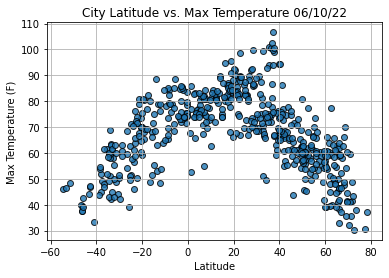

In [13]:
# Import time module
import time 

# Build the scatter plot for latittude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

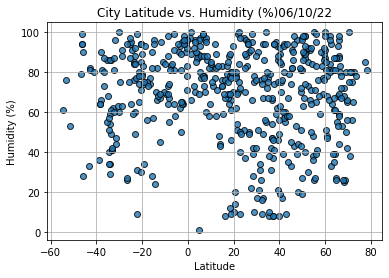

In [14]:
# Build the scatter plot for latittude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

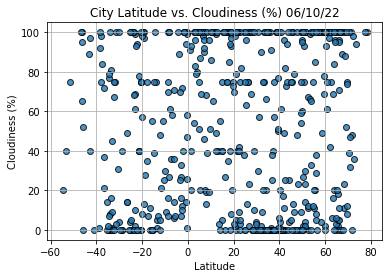

In [15]:
# Build the scatter plot for latittude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

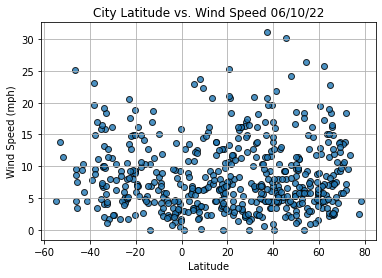

In [16]:
# Build the scatter plot for latittude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## 6.4.1 Use Linear Regression to Find the Relationship Between Variables


In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-06-11 00:29:06
Lat                        -33.65
Lng                      115.3333
Max Temp                    63.54
Humidity                       86
Cloudiness                     81
Wind Speed                  15.88
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
521     True
522     True
523     True
524     True
525     True
Name: Lat, Length: 526, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-06-11 00:26:21,57.7900,-152.4072,60.31,59,100,4.61
1,Port Hardy,CA,2022-06-11 00:29:03,50.6996,-127.4199,59.18,67,75,11.50
3,Guantanamo,CU,2022-06-11 00:29:03,20.1444,-75.2092,83.77,79,70,2.95
4,Longyearbyen,SJ,2022-06-11 00:29:04,78.2186,15.6401,37.24,81,100,4.61
5,Yairipok,IN,2022-06-11 00:29:04,24.6667,94.0667,69.67,97,100,1.43


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature 

#### For the Northern Hemisphere

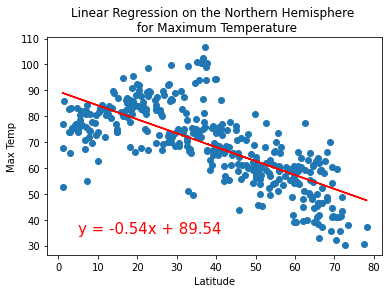

In [22]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,35))

#### For the Southern Hemisphere


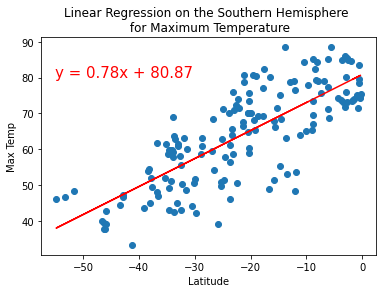

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-55,80))

### Perform Linear Regression on the Percent Humidity 

#### For the Northern Hemisphere

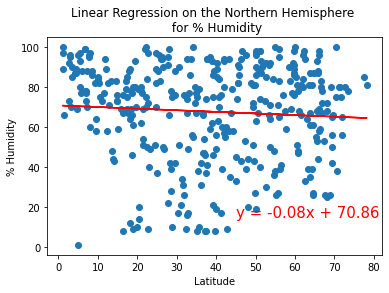

In [24]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

#### For the Southern Hemisphere

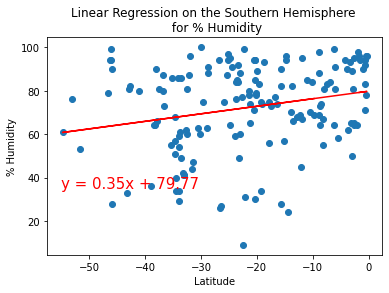

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-55,35))


In [26]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.232


### Perform Linear Regression on the Percent of Cloudiness  

#### For the Northern Hemisphere

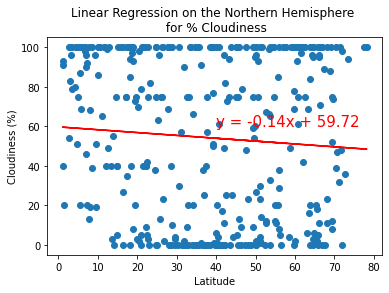

In [27]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness (%)',(40,60))

In [28]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.071


#### For the Southern Hemisphere

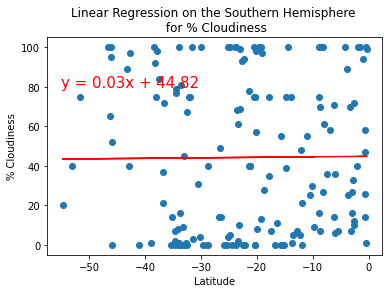

In [29]:
# Linear regression on the Northern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,80))

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.009


### Perform Linear Regression on the Wind Speed

#### For the Northern Hemisphere

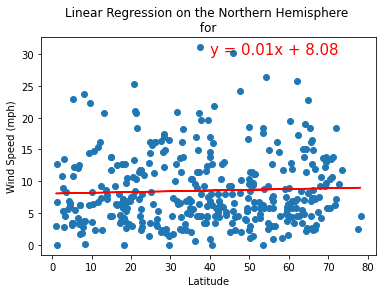

In [31]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for ', 'Wind Speed (mph)',(40,30))

In [32]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.042


#### For the Southern Hemisphere


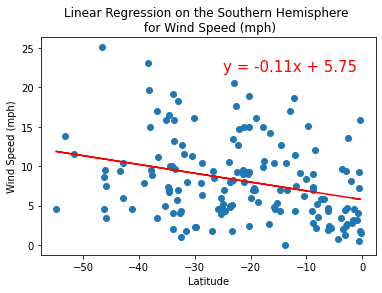

In [33]:
# Linear regression on the Northern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)', 'Wind Speed (mph)',(-25,22))

In [34]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.298
